Loading required package: sp
rgeos version: 0.3-8, (SVN revision 460)
 GEOS runtime version: 3.3.2-CAPI-1.7.2 
 Polygon checking: TRUE 

rgdal: version: 0.9-1, (SVN revision 518)
Geospatial Data Abstraction Library extensions to R successfully loaded
Loaded GDAL runtime: GDAL 1.7.3, released 2010/11/10
Path to GDAL shared files: /usr/share/gdal
GDAL does not use iconv for recoding strings.
Loaded PROJ.4 runtime: Rel. 4.7.1, 23 September 2009, [PJ_VERSION: 470]
Path to PROJ.4 shared files: (autodetected)

Attaching package: ‘proj4’

The following object is masked from ‘package:rgdal’:

    project

Loading required package: lattice
Loading required package: latticeExtra
Loading required package: hexbin
Checking rgeos availability: TRUE
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



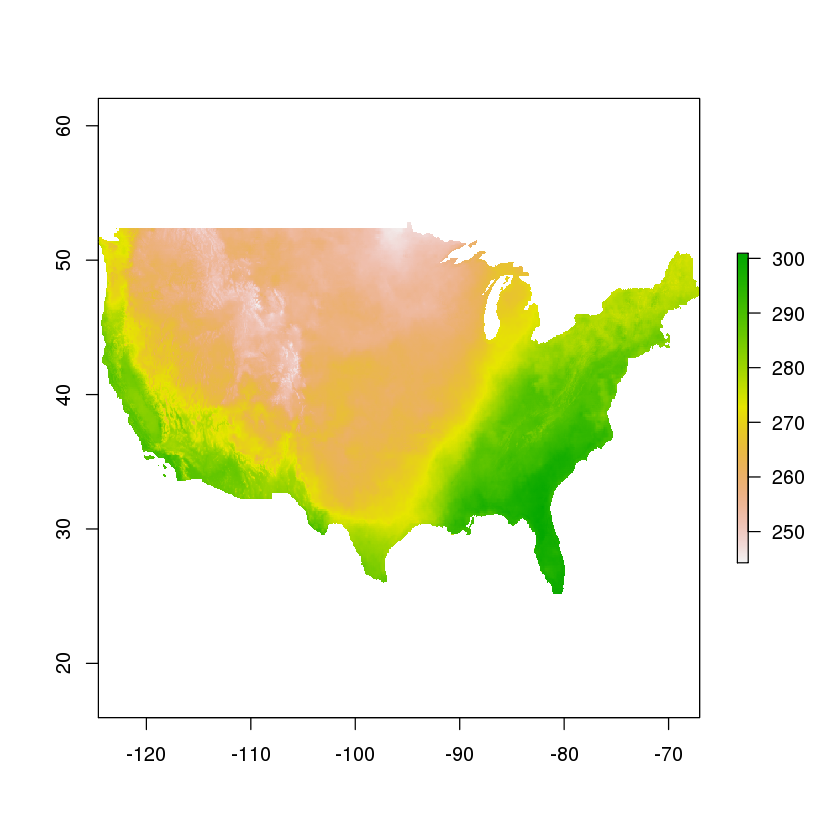

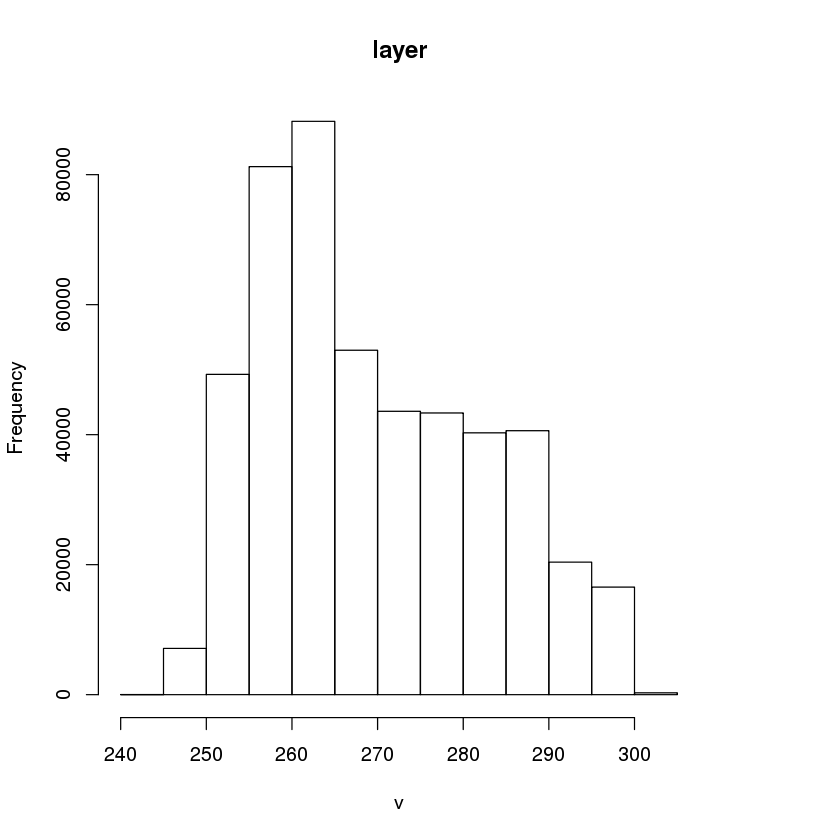

In [1]:
#------------------------------------------------------------------------#
# TITLE:        netcdf_access.R
#
# AUTHOR:       Erich Seamon
#
# INSTITUITON:  College of Natural Resources
#               University of Idaho
#
# DATE:         August 12, 2015
#
# STAGE:        netcdf access
#
# COMMENTS:     This script opens and displays netcdf data.  
#
#--Setting the working directory an d clearing the workspace-----------#

library("ncdf")
library("raster")
library("sp")
library("rgeos")
library("rgdal")
library("proj4")
library("RNetCDF")
library("ncdf4")
library("RColorBrewer")
library("raster")
library("rasterVis")
library("latticeExtra")
library("maptools")
library("parallel")
library("Evapotranspiration")
library("plyr")
library("data.table")
library("sirad")

maxtemp <- nc_open('http://reacchpna.org/thredds/dodsC/agg_met_tmmx_1979_2015_WUSA.nc?
lon[0:1:1385],lat[0:1:584],daily_maximum_temperature[0:1:0][0:1:0][0:1:0],day[0:1:10]')


maxtemp_var <- ncvar_get(maxtemp, 'daily_maximum_temperature', start=c(1,1,1), 
                         count=c(-1,-1,1)) # extract just the variable form the nc file

maxtempraster <- (raster(maxtemp_var)) # turn the file into a raster

xtent <- extent(25.1562, 52.8438, -124.5938, -67.0312) # set the exent of the raster
extent(maxtempraster) <- xtent
crs(maxtempraster) <- "+proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0" # set the projection of the raster

maxtempraster <- setExtent(maxtempraster, xtent, keepres=TRUE)

maxtempraster_transposed <- t(maxtempraster) # transpose the raster 

plot(maxtempraster_transposed) 

hist(maxtempraster_transposed)